In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
warnings.filterwarnings('ignore')

In [5]:
data= pd.read_csv('Bigmart_train.csv')
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
data.sample(6)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
417,FDW35,NaN,low fat,0.019416,Breads,41.6454,OUT019,1985,Small,Tier 1,Grocery Store,83.8908
4151,FDI57,19.850,Low Fat,0.054110,Seafood,195.0768,OUT049,1999,Medium,Tier 1,Supermarket Type1,1970.7680
2289,FDV10,7.645,Regular,0.067083,Snack Foods,44.0112,OUT017,2007,NaN,Tier 2,Supermarket Type1,596.5568
4031,FDO15,NaN,Regular,0.014999,Meat,72.4038,OUT019,1985,Small,Tier 1,Grocery Store,221.7114
5168,NCY05,13.500,Low Fat,0.055076,Health and Hygiene,33.3874,OUT049,1999,Medium,Tier 1,Supermarket Type1,282.2992
2197,FDW50,13.100,Low Fat,0.075731,Dairy,167.5158,OUT045,2002,NaN,Tier 2,Supermarket Type1,1504.0422


In [9]:
data.shape

(8523, 12)

In [11]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
data.isnull().sum()/ len(data)* 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [18]:
# Finding the duplicated values

In [21]:
data.duplicated().any()

False

#### Handle the Missing values

In [25]:
mean_weight= data['Item_Weight'].mean()
median_weight= data['Item_Weight'].median()

In [27]:
print(mean_weight)
print(median_weight)

12.857645184135976
12.6


In [29]:
data['Item_Weight_mean']=data['Item_Weight'].fillna(mean_weight)
data['Item_Weight_median']=data['Item_Weight'].fillna(median_weight)

In [30]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


In [32]:
print("Original Weight variable variance:", data['Item_Weight'].var())
print("Item Weight variable variance after mean imputation:", data['Item_Weight_mean'].var())
print("Item Weight variable variance after median imputation:", data['Item_Weight_median'].var())

Original Weight variable variance: 21.56168825983637
Item Weight variable variance after mean imputation: 17.860121735060453
Item Weight variable variance after median imputation: 17.869561454073366


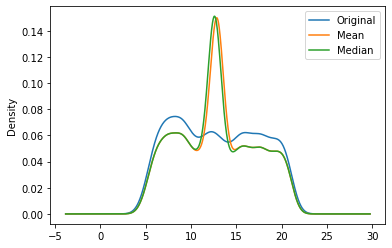

In [33]:
data['Item_Weight'].plot(kind="kde", label="Original")

data['Item_Weight_mean'].plot(kind= "kde", label="Mean")

data['Item_Weight_median'].plot(kind= "kde", label="Median")

plt.legend()
plt.show()

<Axes: >

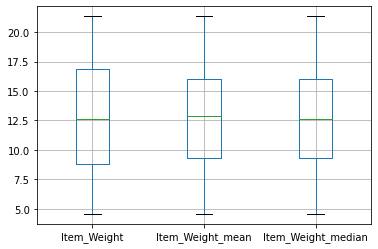

In [35]:
data[['Item_Weight', 'Item_Weight_mean', 'Item_Weight_median']].boxplot()

### Use interpolate method to fill Missing Values

In [36]:
data['Item_Weight_interpolate']=data['Item_Weight'].interpolate(method='linear')

In [37]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median,Item_Weight_interpolate
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93,8.93


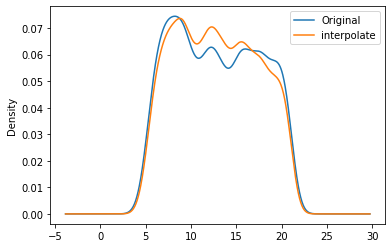

In [38]:
data['Item_Weight'].plot(kind="kde", label="Original")

data['Item_Weight_interpolate'].plot(kind= "kde", label="interpolate")

plt.legend()
plt.show()

Hence this method is preffered among others

### Multivariate Imputation

In [39]:
from sklearn.impute import KNNImputer

In [40]:
knn= KNNImputer(n_neighbors=10, weights='distance')

In [42]:
data['knn_imputer'] =knn.fit_transform(data[['Item_Weight']]).ravel()

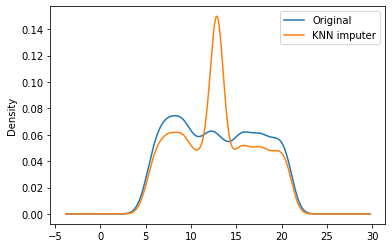

In [45]:
data['Item_Weight'].plot(kind="kde", label="Original")

data['knn_imputer'].plot(kind= "kde", label="KNN imputer")

plt.legend()
plt.show()

Hence Linear Interpolation is the best method to use

#### Hence we will remove all other which are not required

In [46]:
data= data.drop(['Item_Weight', 'Item_Weight_mean', 'Item_Weight_median', 'knn_imputer'], axis=1)

In [47]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [48]:
data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interpolate         0
dtype: int64

### Now lets Handle 'Outlet_Size': It is a categorical Column

In [50]:
data['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [51]:
data['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

#### We will fill missing values based on Outlet Type

In [54]:
mode_outlet= data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x:x.mode([0])))

mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [56]:
missing_values= data['Outlet_Size'].isnull()

In [57]:
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [58]:
data.loc[missing_values, 'Outlet_Size'] =data.loc[missing_values,'Outlet_Type'].apply(lambda x:mode_outlet[x])

In [59]:
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interpolate      0
dtype: int64

In [60]:
# Hence all missing values have been replaced

In [61]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interpolate'],
      dtype='object')

In [62]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

### Consistent Data Labelling coz of repitation

In [63]:
data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat': 'LF', 'reg': 'Regular'}}, inplace= True)

In [64]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
LF         5517
Regular    3006
Name: count, dtype: int64

In [66]:
data['Item_Visibility'].value_counts()

Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64

In [67]:
data['Item_Visibility_Interpolate'] =data['Item_Visibility'].replace(0, np.nan).interpolate(method='linear')

In [69]:
data.head(2)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_Interpolate
0,FDA15,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278


In [70]:
data['Item_Visibility_Interpolate'].value_counts()

Item_Visibility_Interpolate
0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: count, Length: 8405, dtype: int64

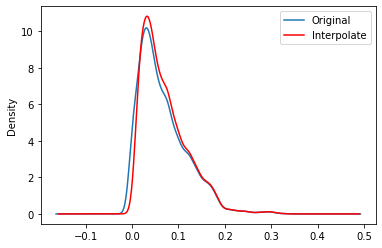

In [71]:
data['Item_Visibility'].plot(kind='kde', label='Original')
data['Item_Visibility_Interpolate'].plot(kind='kde', color= 'red',label='Interpolate')

plt.legend()
plt.show()

In [73]:
data= data.drop('Item_Visibility', axis=1)

In [74]:
data.head(2)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_Interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278


In [75]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Item_Weight_interpolate', 'Item_Visibility_Interpolate'],
      dtype='object')

In [76]:
data['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [78]:
data['Item_Identifier'].value_counts().sample(7)

Item_Identifier
FDD41    6
NCN41    5
FDW39    6
FDZ33    8
NCP05    8
FDP44    6
FDB49    6
Name: count, dtype: int64

In [79]:
data['Item_Identifier']=data['Item_Identifier'].apply(lambda x: x[:2])

In [81]:
data['Item_Identifier'].value_counts()

Item_Identifier
FD    6125
NC    1599
DR     799
Name: count, dtype: int64

In [82]:
data['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

### Converting the years into how many years this shop has been existing


In [83]:
import datetime as dt

In [84]:
current_year= dt.datetime.today().year

In [85]:
current_year

2024

In [87]:
data['Outlet_age']=current_year- data['Outlet_Establishment_Year']

In [88]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_Interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,LF,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,LF,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


In [89]:
data= data.drop('Outlet_Establishment_Year', axis=1)

In [90]:
data.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_Interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,LF,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,LF,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


### Handling Categorical Columns

nb: we will be using ordinal encoding

In [92]:
from sklearn.preprocessing import OrdinalEncoder

data_encoded= data.copy()


cat_cols= data.select_dtypes(include=['object']).columns



for col in cat_cols:
    oe= OrdinalEncoder()
    data_encoded[col]=oe.fit_transform(data_encoded[[col]])
    print(oe.categories_)

[array(['DR', 'FD', 'NC'], dtype=object)]
[array(['LF', 'Regular'], dtype=object)]
[array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)]
[array(['OUT010', 'OUT013', 'OUT017', 'OUT018', 'OUT019', 'OUT027',
       'OUT035', 'OUT045', 'OUT046', 'OUT049'], dtype=object)]
[array(['High', 'Medium', 'Small'], dtype=object)]
[array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)]
[array(['Grocery Store', 'Supermarket Type1', 'Supermarket Type2',
       'Supermarket Type3'], dtype=object)]


In [93]:
data_encoded.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interpolate,Item_Visibility_Interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,25
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,732.3800,19.20,0.015755,26
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,8.93,0.014751,37


### Saving the Vector x & Y

In [94]:
X= data_encoded.drop('Item_Outlet_Sales', axis=1)
y= data_encoded['Item_Outlet_Sales']

In [95]:
X

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interpolate,Item_Visibility_Interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,9.300,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,5.920,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,17.500,0.016760,25
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,19.200,0.015755,26
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,8.930,0.014751,37
...,...,...,...,...,...,...,...,...,...,...,...
8518,1.0,0.0,13.0,214.5218,1.0,0.0,2.0,1.0,6.865,0.056783,37
8519,1.0,1.0,0.0,108.1570,7.0,2.0,1.0,1.0,8.380,0.046982,22
8520,2.0,0.0,8.0,85.1224,6.0,2.0,1.0,1.0,10.600,0.035186,20
8521,1.0,1.0,13.0,103.1332,3.0,1.0,2.0,2.0,7.210,0.145221,15


In [96]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

### Random Forest Regressor

In [97]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

rf= RandomForestRegressor(n_estimators=100, random_state=42)

scores= cross_val_score(rf, X,y, cv=5, scoring='r2')
print(scores.mean())

0.5549992903957147


### XGBRF Regressor

In [98]:
from xgboost import XGBRFRegressor

xg= XGBRFRegressor(n_estimators= 100, random_state=42)
scores= cross_val_score(xg, X,y, cv=5, scoring='r2')
print(scores.mean())

0.5945113007967281


### XGBRF Regressor Feature Importance

In [102]:
xg= XGBRFRegressor(n_estimators= 100, random_state=42)

xg1= xg.fit(X,y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_
    
}).sort_values(by='XGBRF_importance', ascending=False)


,feature,XGBRF_importance
7,Outlet_Type,0.463503
3,Item_MRP,0.159900
10,Outlet_age,0.156871
4,Outlet_Identifier,0.141315
5,Outlet_Size,0.067613
...,...,...
8,Item_Weight_interpolate,0.002724
2,Item_Type,0.002073
6,Outlet_Location_Type,0.001327
0,Item_Identifier,0.000706


In [104]:
from xgboost import XGBRFRegressor

xg= XGBRFRegressor(n_estimators= 100, random_state=42)
scores= cross_val_score(xg1, X.drop(['Item_Visibility_Interpolate','Item_Type', 
                                     'Item_Weight_interpolate','Outlet_Location_Type', 
                                     'Item_Identifier', 'Item_Fat_Content'], axis=1),y, cv=5, scoring='r2')
print(scores.mean())

0.5955051920730533


In [105]:
final_data= X.drop(columns=['Item_Visibility_Interpolate','Item_Type', 
                                     'Item_Weight_interpolate','Outlet_Location_Type', 
                                     'Item_Identifier', 'Item_Fat_Content'], axis=1)

In [106]:
final_data

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,249.8092,9.0,1.0,1.0,25
1,48.2692,3.0,1.0,2.0,15
2,141.6180,9.0,1.0,1.0,25
3,182.0950,0.0,2.0,0.0,26
4,53.8614,1.0,0.0,1.0,37
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,37
8519,108.1570,7.0,2.0,1.0,22
8520,85.1224,6.0,2.0,1.0,20
8521,103.1332,3.0,1.0,2.0,15


### Training Best Model

In [107]:
from xgboost import XGBRFRegressor

In [108]:
xg_final= XGBRFRegressor()

In [109]:
xg_final.fit(final_data, y)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
               grow_policy='depthwise', importance_type=None,
               interaction_constraints='', max_bin=256, max_cat_threshold=64,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, ...)

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [111]:
X_train, X_test, y_train, y_test= train_test_split(final_data,y,
                                                   test_size=0.2,
                                                   random_state=42)

In [112]:
xg_final.fit(X_train,y_train)

XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
               grow_policy='depthwise', importance_type=None,
               interaction_constraints='', max_bin=256, max_cat_threshold=64,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=0,
               reg_alpha=0, ...)

In [114]:
y_pred= xg_final.predict(X_test)

In [115]:
mean_absolute_error(y_test, y_pred)

714.4168458622603

### Prediction on Unseen Data

In [120]:
pred= xg_final.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]

In [121]:
print(f"Sales Value is between {pred -714.42} and {pred +714.42}")

Sales Value is between 1344.67765625 and 2773.51765625


### Save model using Joblib

In [122]:
import joblib

In [123]:
joblib.dump(xg_final, 'bigmart_model')

['bigmart_model']

In [124]:
model= joblib.load('bigmart_model')

In [126]:
pred= model.predict(np.array([[141.6180,9.0,1.0,1.0,24]])) [0]

In [128]:
print(pred)

2059.0977


In [127]:
print(f"Sales Value is between {pred -714.42} and {pred +714.42}")

Sales Value is between 1344.67765625 and 2773.51765625
